<a href="https://colab.research.google.com/github/Naddim04/Caffeine-/blob/main/scabies_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory, image

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.15)

train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/project/dataset/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/project/dataset/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 4074 images belonging to 2 classes.
Found 718 images belonging to 2 classes.


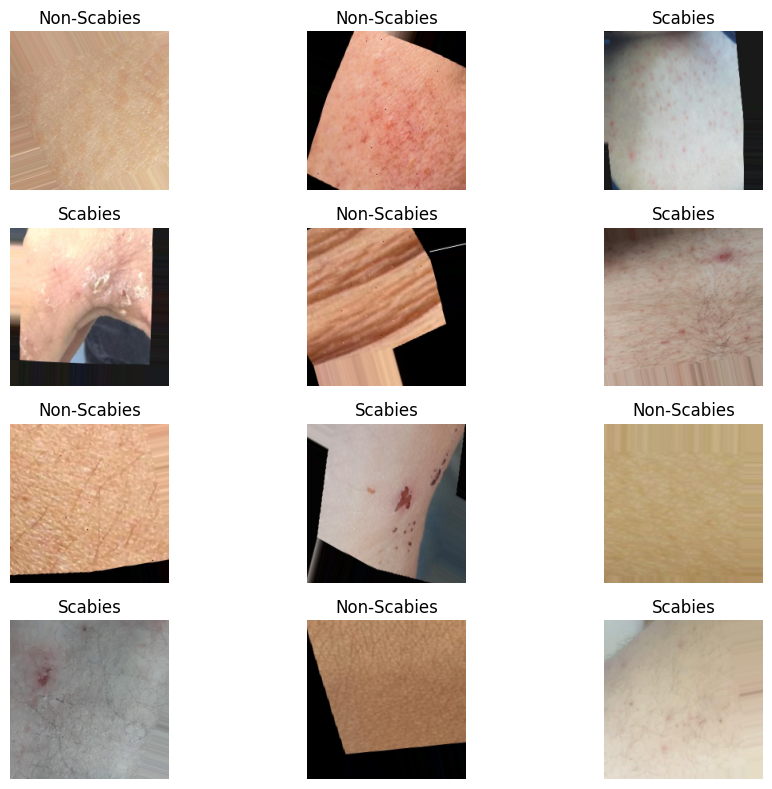

In [ ]:
images, labels = next(train_data) #this tells give me next batch of data from train_data

# Display the first 12 images
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.imshow(images[i])
    label = "Scabies" if labels[i] == 1 else "Non-Scabies"
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print("Class indices:", train_data.class_indices)
print("Classes:", train_data.classes)

Class indices: {'notscabies': 0, 'scabies': 1}
Classes: [0 0 0 ... 1 1 1]


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stop])


Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 81s 582ms/step - accuracy: 0.8415 - loss: 0.5119 - val_accuracy: 0.5223 - val_loss: 1.0276
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 67s 523ms/step - accuracy: 0.8910 - loss: 0.2727 - val_accuracy: 0.6476 - val_loss: 0.6181
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 69s 539ms/step - accuracy: 0.9054 - loss: 0.2292 - val_accuracy: 0.6643 - val_loss: 0.5822
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 67s 522ms/step - accuracy: 0.9161 - loss: 0.2080 - val_accuracy: 0.8259 - val_loss: 0.3821
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 67s 525ms/step - accuracy: 0.9168 - loss: 0.2033 - val_accuracy: 0.8245 - val_loss: 0.3678
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 67s 526ms/step - accuracy: 0.9025 - loss: 0.2441 - val_accuracy: 0.8788 - val_loss: 0.3419
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 68s 532ms/step - accuracy: 0.9210 - loss: 0.2051 - val_accuracy: 0.7591 - val_loss: 0.6079
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 67s 527ms/step - accuracy: 0.9219 - loss: 0

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,284,741 (100.27 MB)

 Trainable params: 8,761,345 (33.42 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 17,522,692 (66.84 MB)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/project/dataset/test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 276 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)
#predicted_classes = (predictions > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


In [ ]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(confusion_matrix(true_classes, predicted_classes))

              precision    recall  f1-score   support

  notscabies       0.72      0.88      0.79       138
     scabies       0.85      0.65      0.74       138

    accuracy                           0.77       276
   macro avg       0.78      0.77      0.76       276
weighted avg       0.78      0.77      0.76       276

[[122  16]
 [ 48  90]]


In [ ]:
loss, accuracy = model.evaluate(test_data)
loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.8136 - loss: 0.4595


0.5198975801467896

In [ ]:
np.unique(train_data.classes, return_counts=True)

(array([0, 1], dtype=int32), array([1949, 2125]))

In [ ]:
# Get true labels from the generator
true_labels = test_data.classes

# Get predicted probabilities
predictions = model.predict(test_data)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


In [ ]:
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")


Optimal Threshold: 0.28


In [ ]:
class_names = ['Non-Scabies', 'Scabies']

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape (1, 200, 200, 3)

    prediction = model.predict(img_array)[0][0]

    # Interpret prediction
    label = class_names[int(prediction > 0.5)]
    confidence = prediction if prediction > 0.28 else 1 - prediction

    # Show result
    print(f"Prediction: {label} ({confidence * 100:.2f}% confidence)")

    return label, confidence


In [ ]:
img_path = '/content/drive/MyDrive/project/dataset/download.jpg'
predict_image(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Non-Scabies (93.01% confidence)


('Non-Scabies', np.float32(0.9301425))

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predict = Dense(1, activation='sigmoid')(x)  # binary classification

model_2 = Model(inputs=base_model.input, outputs=predict)

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_2.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2201s 17s/step - accuracy: 0.6414 - loss: 0.6185 - val_accuracy: 0.6964 - val_loss: 0.6324
Epoch 2/10
 93/128 ━━━━━━━━━━━━━━━━━━━━ 8:08 14s/step - accuracy: 0.7635 - loss: 0.4728